In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from copy import deepcopy
import plotly.graph_objects as go
import sklearn
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
df.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
# Define the mapping from current column names to new column names
# Replace 'Current_Column_Name' with the actual column names in your CSV
column_mapping = {
    '65': 'age',
    'Female': 'gender',
    '0.7': 'Total_Bilirubin',
    '0.1': 'Direct_Bilirubin',
    '187': 'Alkaline_Phosphotase',
    '16': 'Alamine_Aminotransferase',
    '18': 'Aspartate_Aminotransferase',
    '6.8': 'Total_Protiens',
    '3.3': 'Albumin',
    '0.9': 'Albumin_and_Globulin_Ratio',
    '1': 'Dataset'
}

# Rename the columns
df = df.rename(columns=column_mapping)

# Display the DataFrame to verify the changes
print(df)


     age gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     62   Male             10.9               5.5                   699   
1     62   Male              7.3               4.1                   490   
2     58   Male              1.0               0.4                   182   
3     72   Male              3.9               2.0                   195   
4     46   Male              1.8               0.7                   208   
..   ...    ...              ...               ...                   ...   
577   60   Male              0.5               0.1                   500   
578   40   Male              0.6               0.1                    98   
579   52   Male              0.8               0.2                   245   
580   31   Male              1.3               0.5                   184   
581   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0         

In [ ]:
print("number of variables",df.size, "\nnumber of instances", len(df.columns))

number of variables 6402 
number of instances 11


In [ ]:
df.describe(include="all")

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,582.000000,582,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.711340,NaN,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,NaN,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,NaN,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         582 non-null    int64  
 1   gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Protiens              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Dataset                     582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [ ]:
df[df["Albumin_and_Globulin_Ratio"].isnull()]

,age,gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

/var/folders/k9/4h9scfl5705d8bgf7__gzk_h0000gn/T/ipykernel_68998/289534366.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df.gender.unique())
df['Gender_Encoded'] = le.transform(df.gender)
df.drop(['gender'], axis=1, inplace=True)

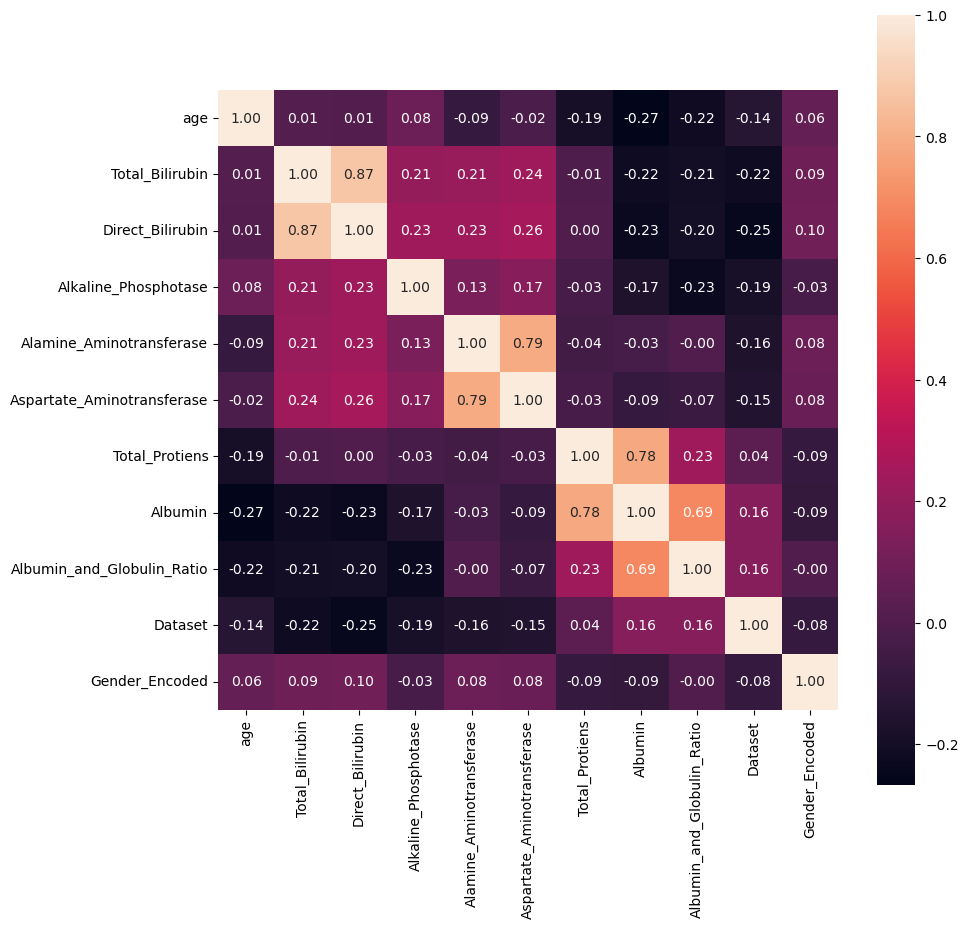

In [ ]:
correlations = df.corr()

# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

In [ ]:
print(pearsonr(df['Total_Bilirubin'], df['Direct_Bilirubin']))

PearsonRResult(statistic=0.8745775779899142, pvalue=1.773396312451426e-184)


In [ ]:
px.scatter(df, x='Total_Bilirubin', y='Direct_Bilirubin')

In [ ]:
px.scatter(df, x='Alamine_Aminotransferase', y='Aspartate_Aminotransferase')

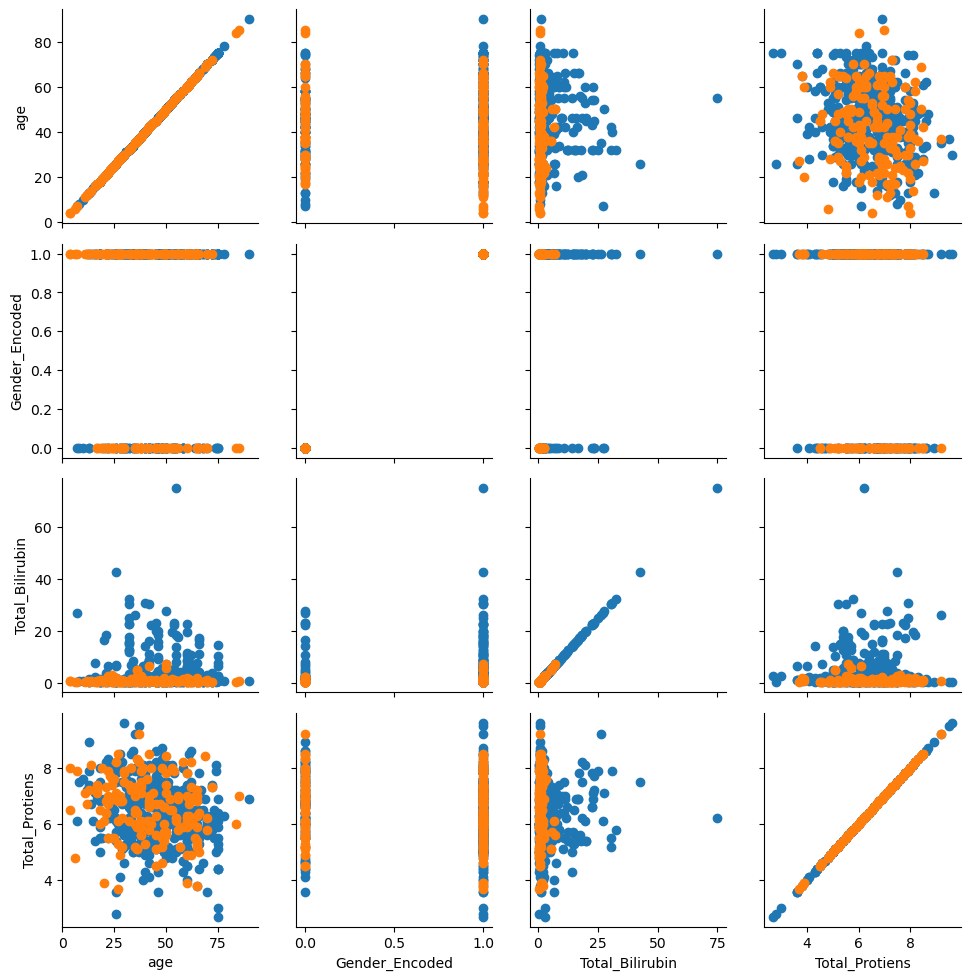

In [ ]:
g = sns.PairGrid(df, hue="Dataset", vars=['age','Gender_Encoded','Total_Bilirubin','Total_Protiens'])
g.map(plt.scatter)
plt.show()

In [ ]:
X = df[['age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
        'Albumin', 'Albumin_and_Globulin_Ratio','Gender_Encoded']]
y = df[['Dataset']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(407, 10) (407, 1) (175, 10) (175, 1)


In [ ]:
model = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1)

model.fit(X_train, y_train)
#testing the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(X_test.head(4))
print('_'*50)
print("Mean Squared Error (MSE):", mse)

# Perform K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=45)

scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:")
print(scores)
print('_'*30)
print(f"Mean Cross-Validation Accuracy: {scores.mean():.2f}")

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy :.2f}")
print('_'*30)
print("Classification Report:")
print(classification_rep)

     age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
197   41              0.9               0.2                   169   
293   22              2.4               1.0                   340   
131   18              0.8               0.2                   199   
151   46              0.8               0.2                   182   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
197                        22                          18             6.1   
293                        25                          21             8.3   
131                        34                          31             6.5   
151                        20                          40             6.0   

     Albumin  Albumin_and_Globulin_Ratio  Gender_Encoded  
197      3.0                        0.90               1  
293      4.5                        1.10               1  
131      3.5                        1.16               0  
151      2.9                    

/Users/madhumitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/madhumitha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/madhumitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/ma

Random Forest Score:  100.0
Random Forest Test Score:  68.0
Accuracy:  0.68

Classification report: 
               precision    recall  f1-score   support

           1       0.76      0.81      0.78       125
           2       0.43      0.36      0.39        50

    accuracy                           0.68       175
   macro avg       0.59      0.58      0.59       175
weighted avg       0.66      0.68      0.67       175



/Users/madhumitha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



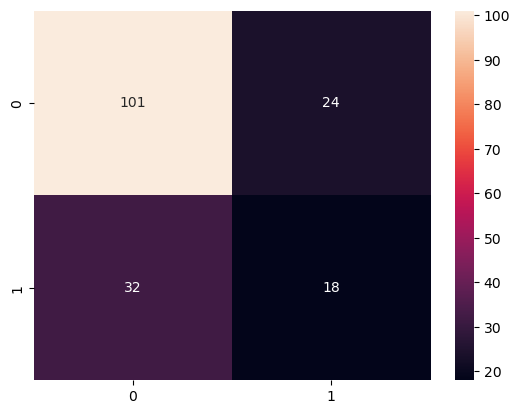

In [ ]:
rf = RandomForestClassifier(n_estimators=25, random_state=2018)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)

random_forest_score      = round(rf.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(rf.score(X_test, y_test) * 100, 2)

print('Random Forest Score: ', random_forest_score)
print('Random Forest Test Score: ', random_forest_score_test)
print('Accuracy: ', accuracy_score(y_test,rf_predicted))
print('\nClassification report: \n', classification_report(y_test,rf_predicted))

g = sns.heatmap(confusion_matrix(y_test,rf_predicted), annot=True, fmt="d")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assume X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.89      0.44      0.59        88
           2       0.33      0.83      0.47        29

    accuracy                           0.54       117
   macro avg       0.61      0.64      0.53       117
weighted avg       0.75      0.54      0.56       117



/Users/madhumitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/madhumitha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assume X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest model with class weights
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.78      0.78      0.78        88
           2       0.34      0.34      0.34        29

    accuracy                           0.68       117
   macro avg       0.56      0.56      0.56       117
weighted avg       0.68      0.68      0.68       117



/Users/madhumitha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



# Model Performance:

## Logistic Regression:

#### Mean Squared Error (MSE):
0.2857142857142857

#### Cross-Validation Accuracy:
0.72

#### Test Accuracy:
0.71

Precision, Recall, F1-score: Higher for class 1 than class 2, indicating an imbalance in class prediction accuracy.
Interpretability: High. Logistic regression provides coefficients that can be easily interpreted to understand the relationship between features and the target variable.


## Random Forest:

#### Training Score: 100.0 (overfitting on training data)

#### Test Accuracy: 0.68

Precision, Recall, F1-score: Similar trends as logistic regression, with higher performance for class 1.
Interpretability: Moderate. While random forests are less interpretable than logistic regression, feature importances can still provide insights into which features are most influential.

## Interpretability:

### Logistic Regression:
Better for interpretability, as it provides clear insights into feature importance and their relationship with the target variable.

### Random Forest:
Less interpretable but provides feature importances which can be useful for understanding the data.

### Performance:

Both models have similar overall accuracy, but logistic regression slightly outperforms random forest in terms of cross-validation and test accuracy.